### An Interactive Demo of Rubinov2010 Complex Network paper

In [9]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import io, os
import pandas as pd
plt.style.use('ggplot')
import numpy as np

--2022-06-22 11:42:14--  https://github.com/yilewang/tvbdemos/raw/master/sc.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yilewang/tvbdemos/master/sc.txt [following]
--2022-06-22 11:42:14--  https://raw.githubusercontent.com/yilewang/tvbdemos/master/sc.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4204 (4.1K) [text/plain]
Saving to: ‘sc.txt’

sc.txt              100%[===================>]   4.11K  --.-KB/s    in 0.001s  

2022-06-22 11:42:15 (3.10 MB/s) - ‘sc.txt’ saved [4204/4204]

--2022-06-22 11:42:15--  https://github.com/yilewang/tvbdemos/raw/master/distance.txt
Resolving github

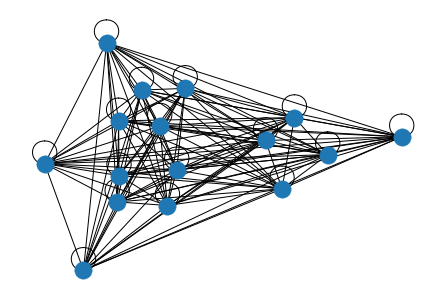

In [2]:
### label information
node_names = {0:'aCNG-L', 1:'aCNG-R',2: 'mCNG-L',3:'mCNG-R',4:'pCNG-L',5:'pCNG-R', 6:'HIP-L',7:'HIP-R',8:'PHG-L',9:'PHG-R',10:'AMY-L',11:'AMY-R', 12:'sTEMp-L',13:'sTEMp-R',14:'mTEMp-L',15:'mTEMp-R'}

### read weight matrix
! wget -c -O sc.txt --no-check-certificate https://github.com/yilewang/tvbdemos/raw/master/sc.txt
! wget -c -O distance.txt --no-check-certificate https://github.com/yilewang/tvbdemos/raw/master/distance.txt
cwd = os.getcwd()
pth = cwd + '/sc.txt' #! change to your own path
openSC = open(pth,"r")
lines = openSC.read()
dfsc = pd.read_csv(io.StringIO(lines), sep='\t', header=None, index_col=None, engine="python")

pth = cwd + '/distance.txt'
openSC = open(pth,"r")
lines = openSC.read()
dfdis = pd.read_csv(io.StringIO(lines), sep='\t', header=None, index_col=None, engine="python")


### drop the edge with weights less than 1
biedge = []
for j in range(16):
    for k in range(16):
        if dfsc.iloc[j,k] > 1:
            biedge.append((j,k))

### weighted graphs
wedges = pd.DataFrame(columns=["from", "to","weight", "distance" ])
for i in range(16):
    for j in range(16):
        wedges = pd.concat([wedges, pd.DataFrame.from_records([{"from":node_names[i], "to":node_names[j], "weight": dfsc.iloc[i,j], "distance":dfdis.iloc[i,j]}])], ignore_index=True)

#Create undirected graph using edgelist
G = nx.from_pandas_edgelist(wedges, 'from', 'to', ['weight', 'distance'])
nx.draw(G)

In [7]:
### create edge network
# G = nx.Graph()
# G.add_edges_from(biedge)
# ### calculate degree centrality
# nx.degree_centrality(G)

# weighted degree centrality

def weighted_degree_centrality(G, method='sum'):
    scdegree = G.degree(weight='weight')
    disdegree = G.degree(weight='distance')
    scsum = sum(dict(scdegree).values())
    if method.lower() in ["sum"]:
        degree_centrality_weighted = [sc/scsum for sc in dict(scdegree).values()]
    if method.lower() in ["distance"]:
        degree_centrality_weighted = [sc/dis for sc,dis in zip(dict(scdegree).values(), dict(disdegree).values())]
    return degree_centrality_weighted

print(weighted_degree_centrality(G, method='distance'))

[0.13358204507661325, 0.1039907233196076, 0.1230037654456741, 0.14590100360744482, 0.03811018810891765, 0.017734584437350237, 0.13344233524078977, 0.13128425988167183, 0.08714504931960869, 0.16001003866667476, 0.03969772256912216, 0.05689642862959348, 0.05341051033706879, 0.10869397502352322, 0.08536290758314209, 0.12267179274679893]


[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

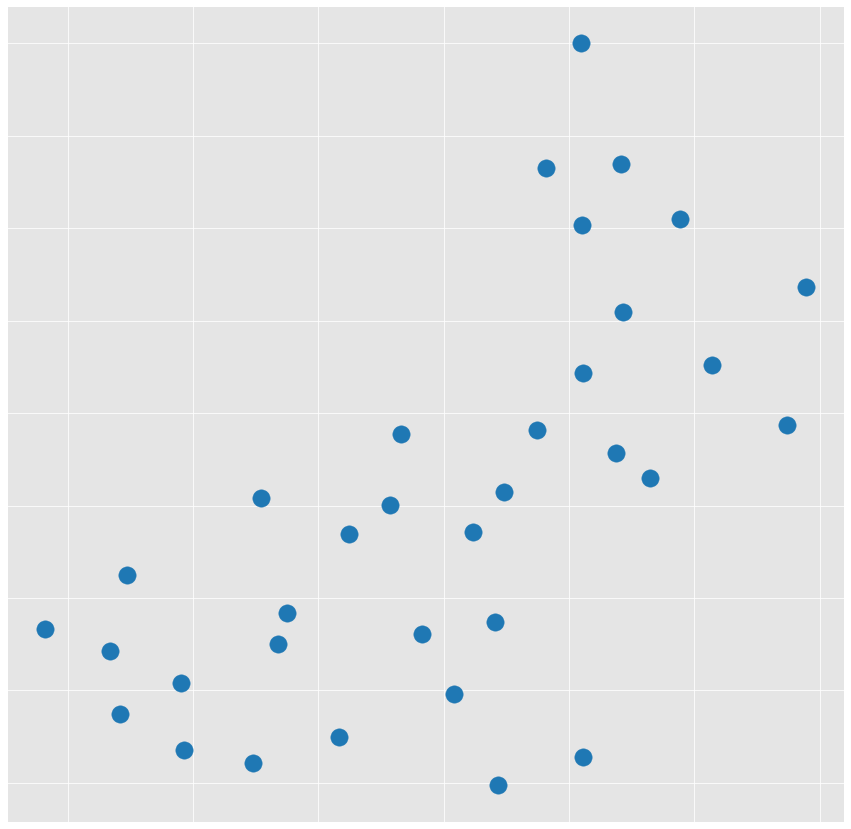

In [10]:
G = nx.karate_club_graph()
print(G.degree)
plt.figure(figsize =(15, 15))
nx.draw_networkx(G, with_labels=True)